<a href="https://colab.research.google.com/github/tomasbelak24/deeplearning-vision/blob/main/hw1/activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Activations (3pt)

Try swapping the activation functions. Test three of the following activation functions sigmoid, tanh, ELU, LeakyReLU and PReLU. You can also test LeakyReLU for different values of the alpha parameter (e.g. 0.3, 0.1, 0.03).

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
from matplotlib import pyplot as plt

100%|██████████| 170M/170M [00:05<00:00, 28.9MB/s]


torch.Size([1, 3, 32, 32])


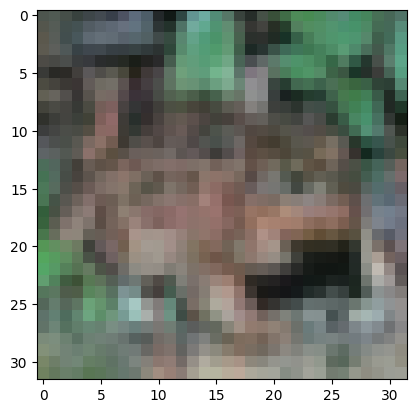

tensor([6])
frog
torch.Size([1, 3, 32, 32])


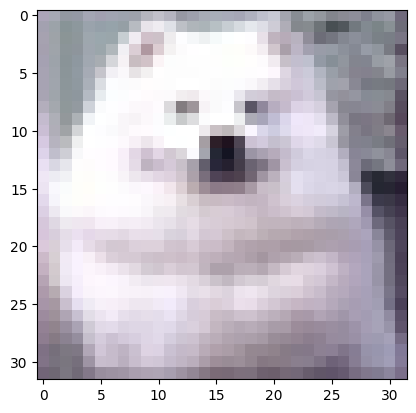

tensor([5])
dog
torch.Size([1, 3, 32, 32])


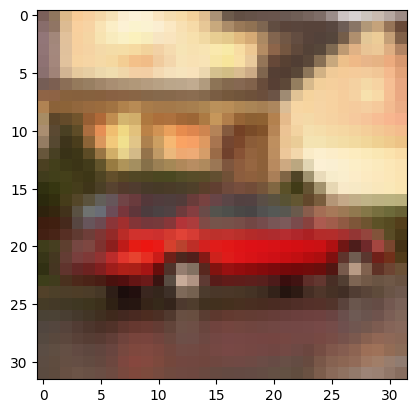

tensor([1])
car
torch.Size([1, 3, 32, 32])


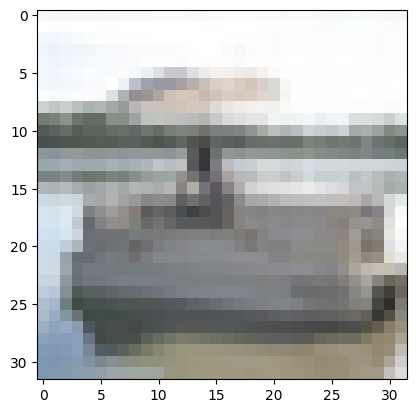

tensor([8])
ship
torch.Size([1, 3, 32, 32])


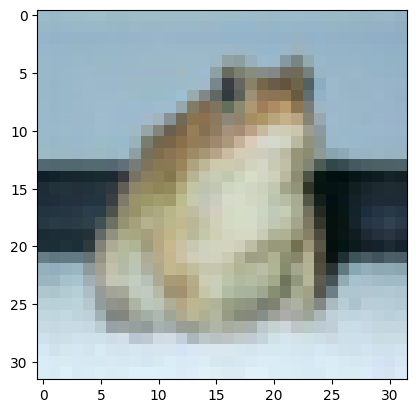

tensor([6])
frog
torch.Size([1, 3, 32, 32])


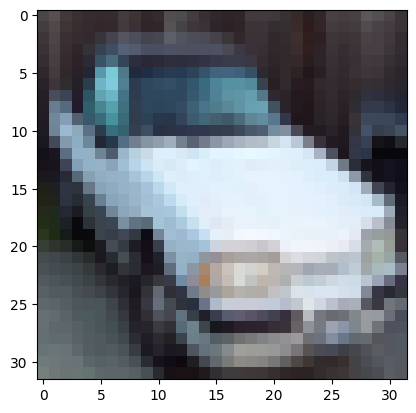

tensor([1])
car
torch.Size([1, 3, 32, 32])


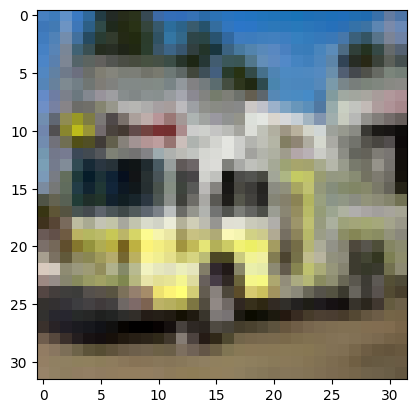

tensor([9])
truck
torch.Size([1, 3, 32, 32])


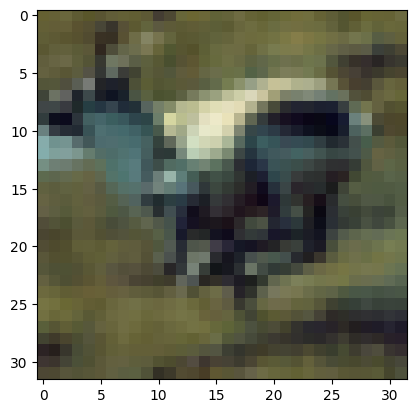

tensor([4])
deer
torch.Size([1, 3, 32, 32])


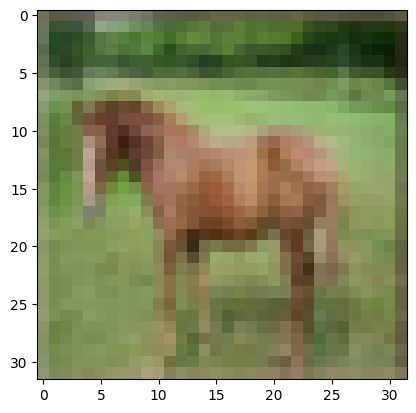

tensor([7])
horse
torch.Size([1, 3, 32, 32])


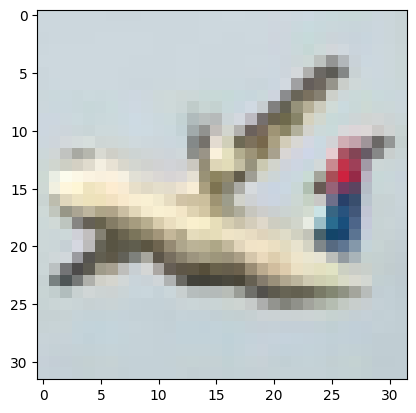

tensor([0])
plane
torch.Size([1, 3, 32, 32])


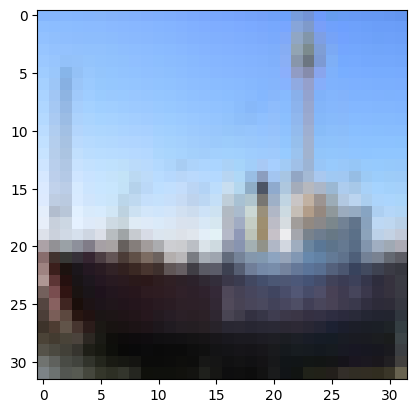

tensor([8])
ship


In [2]:
# @title Loading CIFAR10 dataset

#reused code from the 5th lab

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = transforms.ToTensor()

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# for reproducibility
trainset, valset = torch.utils.data.random_split(dataset, [45000, 5000], generator=torch.Generator().manual_seed(42))

previewloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

for i, sample in enumerate(previewloader):
  if i > 10:
    break
  x, y = sample
  print(x.shape)
  img = np.moveaxis(x.numpy()[0], 0, -1)
  plt.imshow(img)
  plt.show()
  print(y)
  print(classes[y.item()])

In [3]:
from torch.nn import Sequential, Linear, ReLU, Softmax, Sigmoid, ELU, LeakyReLU, PReLU, Conv2d, MaxPool2d, Flatten, AdaptiveAvgPool2d

def build_model_task2(activation_function = ReLU):
  # We have three channels on input in shape N x 3 x 32 x 32
  model = Sequential(
      Conv2d(3, 32, 3), MaxPool2d(2), activation_function(),
      Conv2d(32, 64, 3), MaxPool2d(2), activation_function(),
      Conv2d(64, 128, 3), MaxPool2d(2), activation_function(),
      AdaptiveAvgPool2d(1),Flatten(),
      Linear(128, 64), activation_function(),
      Linear(64, 32), activation_function(),
      Linear(32, 10))

  model_inference = Sequential(model, Softmax(dim=1))
  return model, model_inference

model, model_inference = build_model_task2()

out = model_inference(torch.from_numpy(np.zeros([1, 3, 32, 32], dtype=np.float32)))
print(out.size())
print(out)
print(classes[out.argmax().item()])

torch.Size([1, 10])
tensor([[0.1109, 0.0835, 0.0933, 0.0944, 0.1104, 0.0929, 0.1081, 0.1086, 0.0981,
         0.0997]], grad_fn=<SoftmaxBackward0>)
plane


In [4]:
def one_epoch(model, loss, optimizer, dataloader_train, dataloader_val, verbose=True):
  train_losses = []
  val_losses = []

  model.train()
  for i, batch in enumerate(dataloader_train):
    x, y = batch[0].to(device), batch[1].to(device)
    optimizer.zero_grad()

    out = model(x)
    loss = ce_loss(out, y)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()
    if i % 100 == 0 and verbose:
      print("Training loss at step {}: {}".format(i, loss.item()))

  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for i, batch in enumerate(dataloader_val):
      x, y = batch[0].to(device), batch[1].to(device)

      out = model(x)
      loss = ce_loss(out, y)
      acc = torch.sum(torch.argmax(out, dim=-1) == y)
      correct += acc.item()
      total += len(batch[1])
      val_losses.append(loss.item())

  val_acc = correct / total

  return np.mean(train_losses), np.mean(val_losses), val_acc

Using device:  cuda:0
Trying activation function:  LeakyReLU(0.3)
Val loss at epoch 0: 1.478771808800424
Val acc at epoch 0: 0.4698
Val loss at epoch 1: 1.2356346412828774
Val acc at epoch 1: 0.558
Val loss at epoch 2: 1.0767509500691845
Val acc at epoch 2: 0.6194
Val loss at epoch 3: 0.9769641088831956
Val acc at epoch 3: 0.654
Val loss at epoch 4: 0.9777394964057169
Val acc at epoch 4: 0.6512
Val loss at epoch 5: 0.8928908191289112
Val acc at epoch 5: 0.6828
Val loss at epoch 6: 0.8807697620741122
Val acc at epoch 6: 0.6954
Val loss at epoch 7: 0.9397246516813897
Val acc at epoch 7: 0.6872
Val loss at epoch 8: 0.9166435652477726
Val acc at epoch 8: 0.6894
Val loss at epoch 9: 0.8680226939498998
Val acc at epoch 9: 0.7148
Val loss at epoch 10: 0.8729588603897459
Val acc at epoch 10: 0.7128
Val loss at epoch 11: 0.9069371743566671
Val acc at epoch 11: 0.717
Val loss at epoch 12: 0.9040511366288373
Val acc at epoch 12: 0.7158
Val loss at epoch 13: 0.8930591207211185
Val acc at epoch 13:

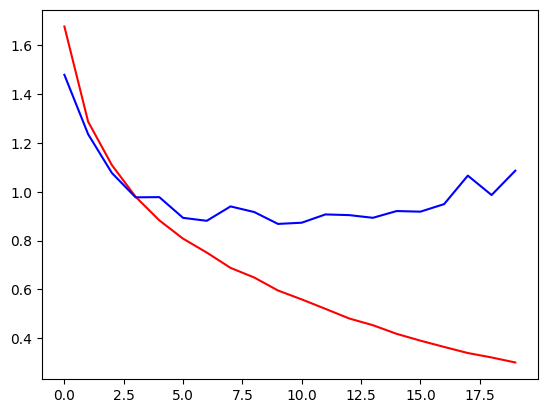

Trying activation function:  LeakyReLU(0.1)
Val loss at epoch 0: 1.5005121474053449
Val acc at epoch 0: 0.4482
Val loss at epoch 1: 1.2544695879243741
Val acc at epoch 1: 0.5368
Val loss at epoch 2: 1.1367266493238461
Val acc at epoch 2: 0.5968
Val loss at epoch 3: 0.99724584134521
Val acc at epoch 3: 0.6454
Val loss at epoch 4: 0.9638285519211156
Val acc at epoch 4: 0.6558
Val loss at epoch 5: 0.8841482805218667
Val acc at epoch 5: 0.687
Val loss at epoch 6: 0.8661191526112283
Val acc at epoch 6: 0.6994
Val loss at epoch 7: 0.8585714175822629
Val acc at epoch 7: 0.7064
Val loss at epoch 8: 0.8559974277285254
Val acc at epoch 8: 0.7066
Val loss at epoch 9: 0.8641638064840037
Val acc at epoch 9: 0.7022
Val loss at epoch 10: 0.8232289355271941
Val acc at epoch 10: 0.724
Val loss at epoch 11: 0.9121419445724245
Val acc at epoch 11: 0.7096
Val loss at epoch 12: 0.8902794775689483
Val acc at epoch 12: 0.7166
Val loss at epoch 13: 0.8659456267858007
Val acc at epoch 13: 0.7278
Val loss at ep

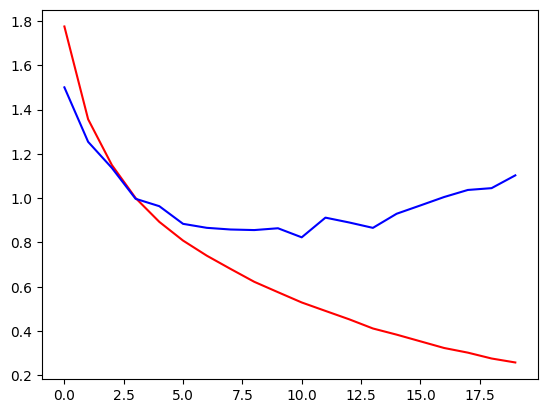

Trying activation function:  LeakyReLU(0.03)
Val loss at epoch 0: 1.5283267323378544
Val acc at epoch 0: 0.4492
Val loss at epoch 1: 1.3072155729220931
Val acc at epoch 1: 0.535
Val loss at epoch 2: 1.294962968795922
Val acc at epoch 2: 0.5488
Val loss at epoch 3: 1.050884379323121
Val acc at epoch 3: 0.6258
Val loss at epoch 4: 0.9915817076233542
Val acc at epoch 4: 0.6418
Val loss at epoch 5: 0.8903874675179743
Val acc at epoch 5: 0.6798
Val loss at epoch 6: 0.8470317529644936
Val acc at epoch 6: 0.7102
Val loss at epoch 7: 0.8714566147251493
Val acc at epoch 7: 0.689
Val loss at epoch 8: 0.851058094554646
Val acc at epoch 8: 0.7084
Val loss at epoch 9: 0.8302451744201077
Val acc at epoch 9: 0.714
Val loss at epoch 10: 0.8586902299504371
Val acc at epoch 10: 0.7248
Val loss at epoch 11: 0.8602171735778735
Val acc at epoch 11: 0.7278
Val loss at epoch 12: 0.8587035405787693
Val acc at epoch 12: 0.7156
Val loss at epoch 13: 0.9476467915780985
Val acc at epoch 13: 0.7096
Val loss at epo

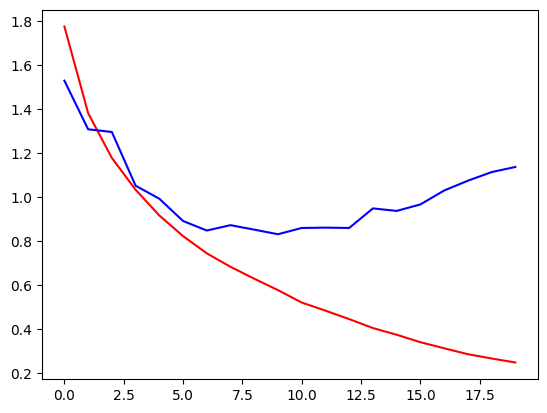

Trying activation function:  LeakyReLU
Val loss at epoch 0: 1.5900646873340485
Val acc at epoch 0: 0.405
Val loss at epoch 1: 1.2577768400975853
Val acc at epoch 1: 0.5496
Val loss at epoch 2: 1.1172176390696482
Val acc at epoch 2: 0.5998
Val loss at epoch 3: 1.0830496523031004
Val acc at epoch 3: 0.6144
Val loss at epoch 4: 0.9617306047184452
Val acc at epoch 4: 0.6572
Val loss at epoch 5: 0.9496700983897896
Val acc at epoch 5: 0.6658
Val loss at epoch 6: 0.8575787280395533
Val acc at epoch 6: 0.6976
Val loss at epoch 7: 0.8619200408838357
Val acc at epoch 7: 0.6982
Val loss at epoch 8: 0.892310426683183
Val acc at epoch 8: 0.6954
Val loss at epoch 9: 0.8823538113171887
Val acc at epoch 9: 0.697
Val loss at epoch 10: 0.9395156329984118
Val acc at epoch 10: 0.6926
Val loss at epoch 11: 0.8632146102987277
Val acc at epoch 11: 0.719
Val loss at epoch 12: 0.8926780480108444
Val acc at epoch 12: 0.7144
Val loss at epoch 13: 0.9131796098059151
Val acc at epoch 13: 0.7132
Val loss at epoch 1

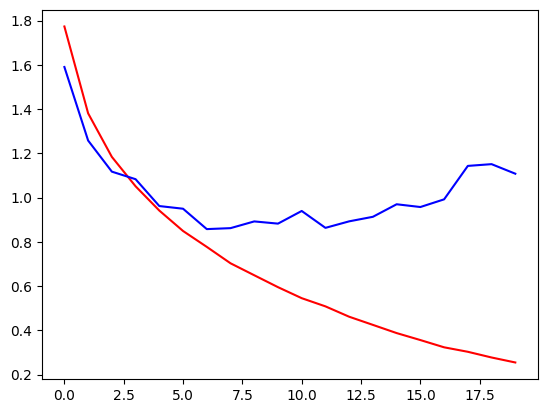

Trying activation function:  Sigmoid
Val loss at epoch 0: 2.0442904454127997
Val acc at epoch 0: 0.2174
Val loss at epoch 1: 1.8942306353028413
Val acc at epoch 1: 0.2726
Val loss at epoch 2: 1.8263117484985643
Val acc at epoch 2: 0.3096
Val loss at epoch 3: 1.733614689225604
Val acc at epoch 3: 0.3488
Val loss at epoch 4: 1.6932666924349062
Val acc at epoch 4: 0.366
Val loss at epoch 5: 1.6259837499849357
Val acc at epoch 5: 0.3952
Val loss at epoch 6: 1.6657878927364471
Val acc at epoch 6: 0.3928
Val loss at epoch 7: 1.533353515491364
Val acc at epoch 7: 0.4348
Val loss at epoch 8: 1.5388200905672305
Val acc at epoch 8: 0.44
Val loss at epoch 9: 1.506694975931933
Val acc at epoch 9: 0.447
Val loss at epoch 10: 1.4887258972331976
Val acc at epoch 10: 0.4414
Val loss at epoch 11: 1.505068747101316
Val acc at epoch 11: 0.4438
Val loss at epoch 12: 1.4020192926856363
Val acc at epoch 12: 0.4838
Val loss at epoch 13: 1.375388247571933
Val acc at epoch 13: 0.496
Val loss at epoch 14: 1.345

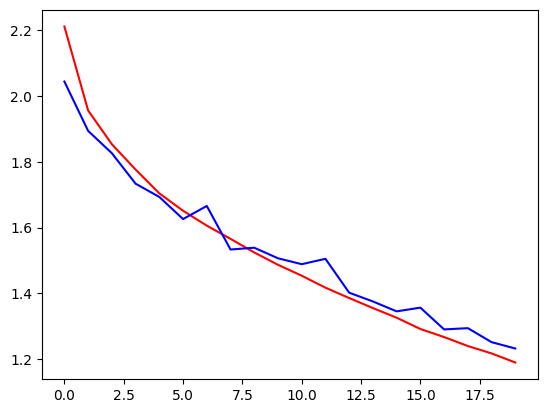

Trying activation function:  ELU
Val loss at epoch 0: 1.3865351384612405
Val acc at epoch 0: 0.5012
Val loss at epoch 1: 1.147024551774286
Val acc at epoch 1: 0.5894
Val loss at epoch 2: 1.0421309998840282
Val acc at epoch 2: 0.6202
Val loss at epoch 3: 0.9716054347290355
Val acc at epoch 3: 0.6576
Val loss at epoch 4: 0.9677608631978369
Val acc at epoch 4: 0.6614
Val loss at epoch 5: 0.901733118827176
Val acc at epoch 5: 0.6838
Val loss at epoch 6: 0.8812900352629887
Val acc at epoch 6: 0.6878
Val loss at epoch 7: 0.8427911560246899
Val acc at epoch 7: 0.7032
Val loss at epoch 8: 0.8459809079861186
Val acc at epoch 8: 0.7084
Val loss at epoch 9: 0.8404409442168133
Val acc at epoch 9: 0.7234
Val loss at epoch 10: 0.8623076055649739
Val acc at epoch 10: 0.7134
Val loss at epoch 11: 0.9187191364112174
Val acc at epoch 11: 0.7106
Val loss at epoch 12: 0.8809652481299297
Val acc at epoch 12: 0.7216
Val loss at epoch 13: 0.984099922286477
Val acc at epoch 13: 0.703
Val loss at epoch 14: 1.0

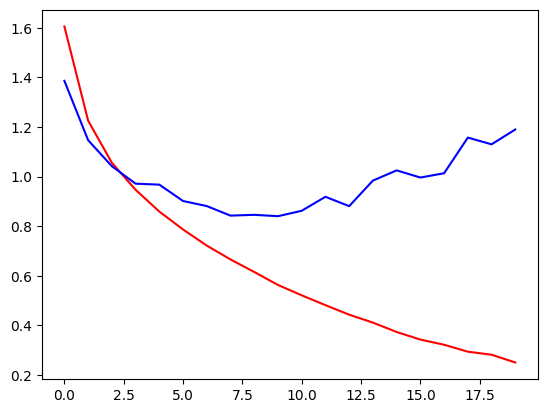

Trying activation function:  PReLU
Val loss at epoch 0: 1.446561861190067
Val acc at epoch 0: 0.4774
Val loss at epoch 1: 1.232412899375721
Val acc at epoch 1: 0.555
Val loss at epoch 2: 1.043466520916884
Val acc at epoch 2: 0.6238
Val loss at epoch 3: 0.97535948009248
Val acc at epoch 3: 0.657
Val loss at epoch 4: 0.9215282600396758
Val acc at epoch 4: 0.6686
Val loss at epoch 5: 0.8768318352425933
Val acc at epoch 5: 0.6924
Val loss at epoch 6: 0.9776373403087543
Val acc at epoch 6: 0.6576
Val loss at epoch 7: 0.8503457743460965
Val acc at epoch 7: 0.7032
Val loss at epoch 8: 0.853843935166195
Val acc at epoch 8: 0.711
Val loss at epoch 9: 0.8514445338659226
Val acc at epoch 9: 0.7154
Val loss at epoch 10: 0.8341722268207817
Val acc at epoch 10: 0.725
Val loss at epoch 11: 0.8662783319403411
Val acc at epoch 11: 0.7192
Val loss at epoch 12: 0.8925376338943555
Val acc at epoch 12: 0.723
Val loss at epoch 13: 0.8886675428433023
Val acc at epoch 13: 0.7262
Val loss at epoch 14: 0.941993

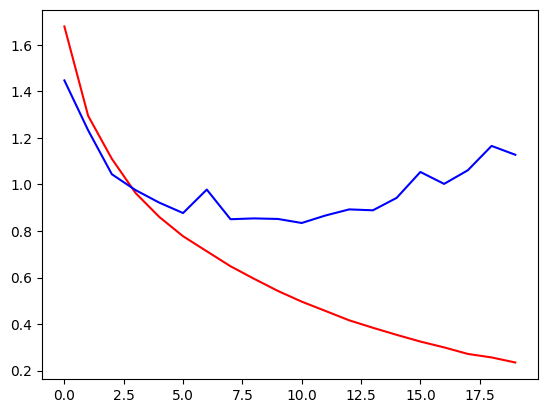

In [5]:
activation_functions = [lambda: LeakyReLU(0.3), lambda: LeakyReLU(0.1), lambda: LeakyReLU(0.03), LeakyReLU, Sigmoid, ELU, PReLU]
activation_functions_str = ["LeakyReLU(0.3)", "LeakyReLU(0.1)", "LeakyReLU(0.03)", "LeakyReLU", "Sigmoid", "ELU", "PReLU"]
losses = {act_f: ([], []) for act_f in activation_functions_str}
accuracies = {act_f: [] for act_f in activation_functions_str}

batch_size = 32

dataloader_train = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

ce_loss = torch.nn.CrossEntropyLoss().to(device)

for activation_function, activation_function_str in zip(activation_functions, activation_functions_str):
  print("Trying activation function: ", activation_function_str)

  model, model_inference = build_model_task2(activation_function)

  model.to(device)
  model_inference.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

  epoch_train_losses = []
  epoch_val_losses = []
  epoch_val_accs = []

  for e in range(20):
    train_loss, val_loss, val_acc = one_epoch(model, ce_loss, optimizer, dataloader_train, dataloader_val, False)

    print("Val loss at epoch {}: {}".format(e, val_loss))
    print("Val acc at epoch {}: {}".format(e, val_acc))

    epoch_train_losses.append(train_loss)
    epoch_val_losses.append(val_loss)
    epoch_val_accs.append(val_acc)

  losses[activation_function_str][0].append(epoch_train_losses)
  losses[activation_function_str][1].append(epoch_val_losses)
  accuracies[activation_function_str].append(epoch_val_accs)

  plt.plot(epoch_train_losses, c='r')
  plt.plot(epoch_val_losses, c='b')
  plt.show()


In [6]:
import json

# Combine the losses and accuracies into a single dictionary
results_to_dump = {
    'losses': losses,
    'accuracies': accuracies
}

# Specify the filename
output_filename = 'activation_function_results.json'

# Dump the dictionary to a JSON file
with open(output_filename, 'w') as f:
    json.dump(results_to_dump, f)

print(f"Results dumped to {output_filename}")

Results dumped to activation_function_results.json


In [7]:
!mkdir -p baseline
# I might make the repo private in the future so the files from /baseline directory from the zip file might have to be used
!wget -O baseline/baseline_model.pth https://raw.githubusercontent.com/tomasbelak24/deeplearning-vision/main/hw1/baseline_model.pth
!wget -O baseline/baseline_results.json https://raw.githubusercontent.com/tomasbelak24/deeplearning-vision/main/hw1/baseline_results.json


--2025-10-30 17:46:11--  https://raw.githubusercontent.com/tomasbelak24/deeplearning-vision/main/hw1/baseline_model.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419703 (410K) [application/octet-stream]
Saving to: ‘baseline/baseline_model.pth’

baseline/baseline_m 100%[===================>] 409.87K  --.-KB/s    in 0.01s   

2025-10-30 17:46:11 (32.8 MB/s) - ‘baseline/baseline_model.pth’ saved [419703/419703]

--2025-10-30 17:46:11--  https://raw.githubusercontent.com/tomasbelak24/deeplearning-vision/main/hw1/baseline_results.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
H

In [8]:
import json

with open('baseline/baseline_results.json', 'r') as f:
    baseline_results = json.load(f)

baseline_train_losses = baseline_results['train_losses']
baseline_val_losses = baseline_results['val_losses']
baseline_val_accs = baseline_results['val_accuracies']

print("Baseline results loaded successfully.")

Baseline results loaded successfully.


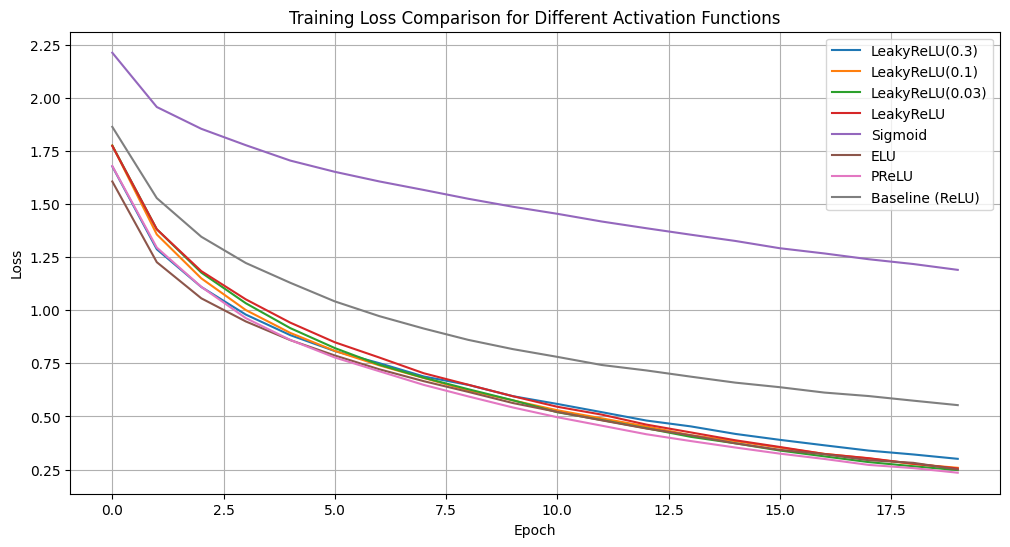

In [9]:
plt.figure(figsize=(12, 6))
for activation_function_str in activation_functions_str:
    plt.plot(losses[activation_function_str][0][0], label=activation_function_str)

# Assuming you have the baseline model's train_losses stored in baseline_train_losses
plt.plot(baseline_train_losses, label='Baseline (ReLU)')

plt.title('Training Loss Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

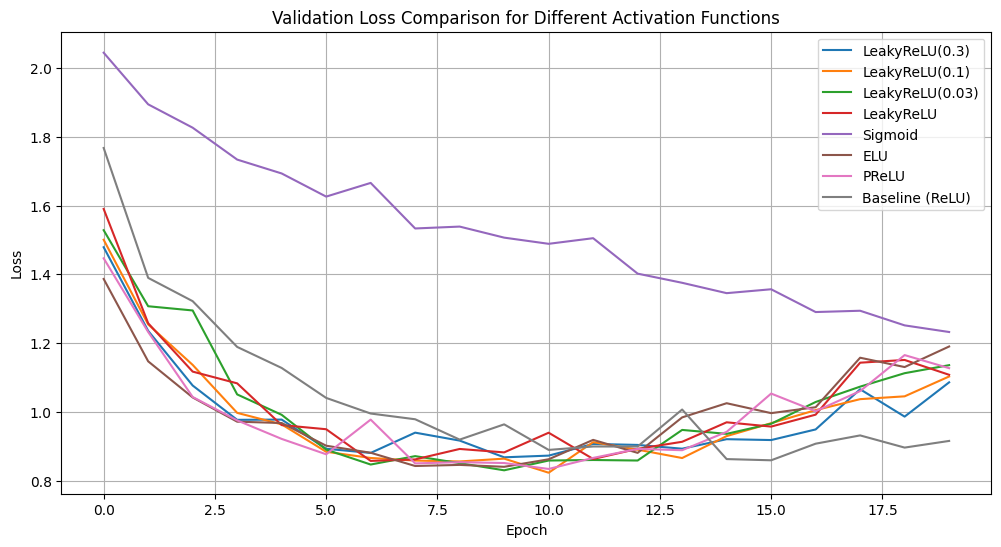

In [10]:
plt.figure(figsize=(12, 6))
for activation_function_str in activation_functions_str:
    plt.plot(losses[activation_function_str][1][0], label=activation_function_str)

# Assuming you have the baseline model's val_losses stored in baseline_val_losses
plt.plot(baseline_val_losses, label='Baseline (ReLU)')

plt.title('Validation Loss Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

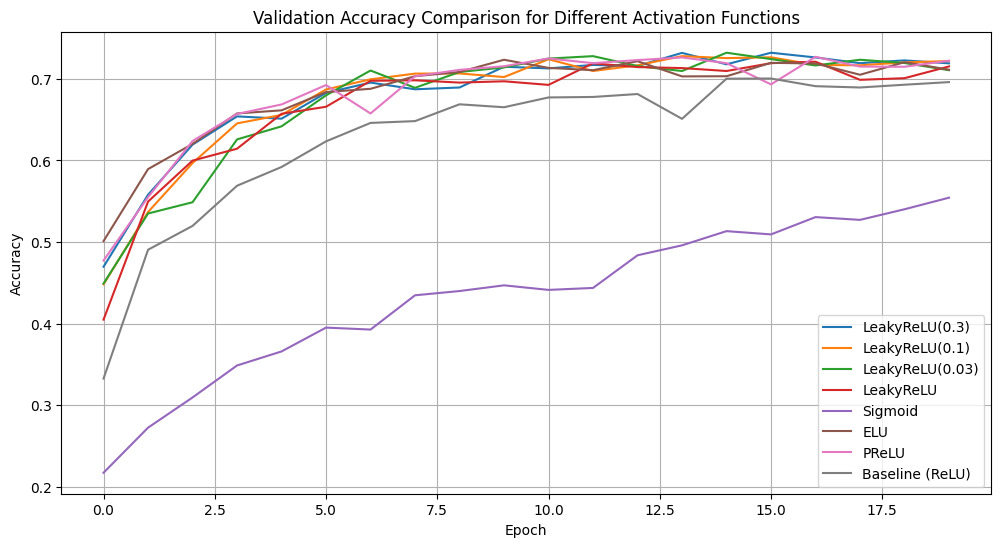

In [11]:
plt.figure(figsize=(12, 6))
for activation_function_str in accuracies.keys():
    plt.plot(accuracies[activation_function_str][0], label=activation_function_str)

# Assuming you have the baseline model's val_accs stored in baseline_val_accs
plt.plot(baseline_val_accs, label='Baseline (ReLU)')

plt.title('Validation Accuracy Comparison for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

summary_data = {}

# Get baseline results
summary_data['Baseline (ReLU)'] = {
    'Final Train Loss': baseline_train_losses[-1],
    'Final Val Loss': baseline_val_losses[-1],
    'Final Val Accuracy': baseline_val_accs[-1]
}

# Get results for each activation function
for activation_function_str in activation_functions_str:
    summary_data[activation_function_str] = {
        'Final Train Loss': losses[activation_function_str][0][0][-1],
        'Final Val Loss': losses[activation_function_str][1][0][-1],
        'Final Val Accuracy': accuracies[activation_function_str][0][-1]
    }

summary_df = pd.DataFrame.from_dict(summary_data, orient='index')
display(summary_df)

,Final Train Loss,Final Val Loss,Final Val Accuracy
Baseline (ReLU),0.553116,0.915671,0.6960
LeakyReLU(0.3),0.300380,1.086018,0.7190
LeakyReLU(0.1),0.258056,1.103045,0.7218
LeakyReLU(0.03),0.247329,1.135959,0.7106
LeakyReLU,0.254940,1.107904,0.7152
Sigmoid,1.189785,1.232322,0.5544
ELU,0.250316,1.190217,0.7112
PReLU,0.235001,1.127245,0.7222
